In [20]:
using Plots
using LaTeXStrings
using LinearAlgebra
empty!(ARGS)
push!(ARGS, "/home/julisn/Codes/lDGA_pp_test/test_2")
push!(ARGS, "/home/julisn/Codes/lDGA_pp_test/test_2")

#scalefontsizes(1.8)
include("../expand_vertex_pp.jl");

opening: /home/julisn/Codes/lDGA_pp_test/test_2/freqList.jld2
Generating Eigenspace:   0.0% done.

  Activating project at `~/Codes/lDGAPostprocessing`


Eigenspace generated!                  
Expanding Vertex for nFermi=50, nBose=50, shift=1
Done expanding!


# Asymptotic Behavior

## $\Gamma$ 

$\Gamma^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} $

## $F$

$F^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp} + U \lambda^{\nu\omega}_d + U \lambda^{\nu'\omega}_d + U^2 \chi^{\omega}_d$

$F^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp}  + U \lambda^{\nu\omega}_m + U \lambda^{\nu'\omega}_m + U^2 \chi^{\omega}_m$

$F^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} + 2U \lambda^{\nu\omega}_{pp,s} + 2U \lambda^{\nu'\omega}_{pp,s} + 2 U^2 \chi^{\omega}_{pp,s}$


In [21]:
Γd_lim =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 
Γm_lim = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 
Γs_lim = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2;

Fd_lim =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 
Fm_lim = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 
Fs_lim = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2;

#Γm_diags = dropdims(mapslices(x->diag(x), Γm, dims=(1,2)),dims=2);
#Γd_diags = dropdims(mapslices(x->diag(x), Γd, dims=(1,2)),dims=2);
#Γs_diags = dropdims(mapslices(x->diag(x), Γs, dims=(1,2)),dims=2);

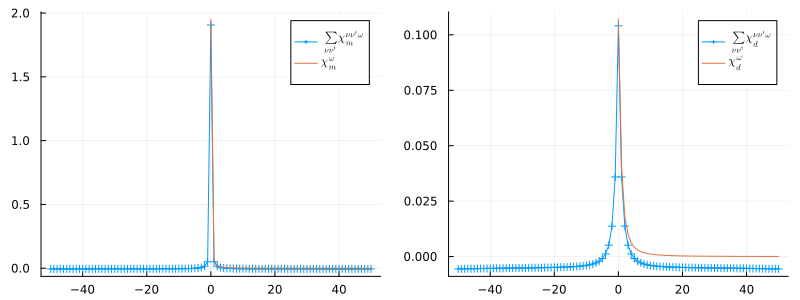

In [22]:
# Checking sign of χ^νν'ω_DMFT

χm_gen_rs = reshape(χm_gen, 2*nFermi, 2*nFermi, 2*nBose+1);
χd_gen_rs = reshape(χd_gen, 2*nFermi, 2*nFermi, 2*nBose+1);

χm = dropdims(sum(χm_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
χd = dropdims(sum(χd_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
p1 = plot(-nBose:nBose, real(χm), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_m ")
plot!(0:nBose, real(χ_m_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_m")
p2 = plot(-nBose:nBose, real(χd), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_d ")
plot!(0:nBose, real(χ_d_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_d")
plot(p1,p2, size=(800,300))

In [23]:
# - compensates global -1 factor in script

println("Γd exact ?=? border:  $(real(-Γd_lim)) ?=? $(real(Γd[1,1,1] * β^2))")
println("Γm exact ?=? border:  $(real(-Γm_lim)) ?=? $(real(Γm[1,1,1] * β^2))")
println("Γd^{-20,-50,-100} = $(-real(Γd[30,1,1])) ?=? $(U/β^2)")
println("Γm^{-20,-50,-100} = $(-real(Γm[30,1,1])) ?=? $(-U/β^2)")

Γd exact ?=? border:  -13.920555565599999 ?=? -13.920527002238714
Γm exact ?=? border:  5.688186775616 ?=? 5.710033409579296
Γd^{-20,-50,-100} = 0.07948534254599374 ?=? 0.08
Γm^{-20,-50,-100} = -0.08122564883168898 ?=? -0.08


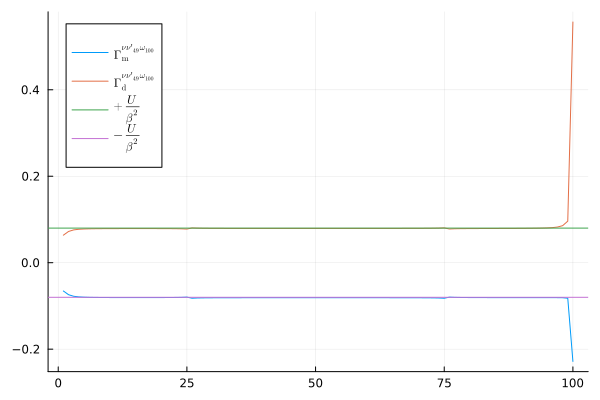

In [24]:
lim_b = U/β^2

plot(real(-Γm[:,end,end]),  label=L"\Gamma_\mathrm{m}^{\nu\nu'_{49}\omega_{100}}")
plot!(real(-Γd[:,end,end]), label=L"\Gamma_\mathrm{d}^{\nu\nu'_{49}\omega_{100}}")
hline!([ lim_b], label=L"+\frac{U}{\beta^2}")
hline!([-lim_b], label=L"-\frac{U}{\beta^2}")

# PP channel
## chi

In [25]:
ωi0 = nBose+1;

In [26]:
ωi,νi,νpi = lDGAPostprocessing.Freq_to_OneToIndex(2, 0, 0, shift, nBose, nFermi)


(53, 52, 52)

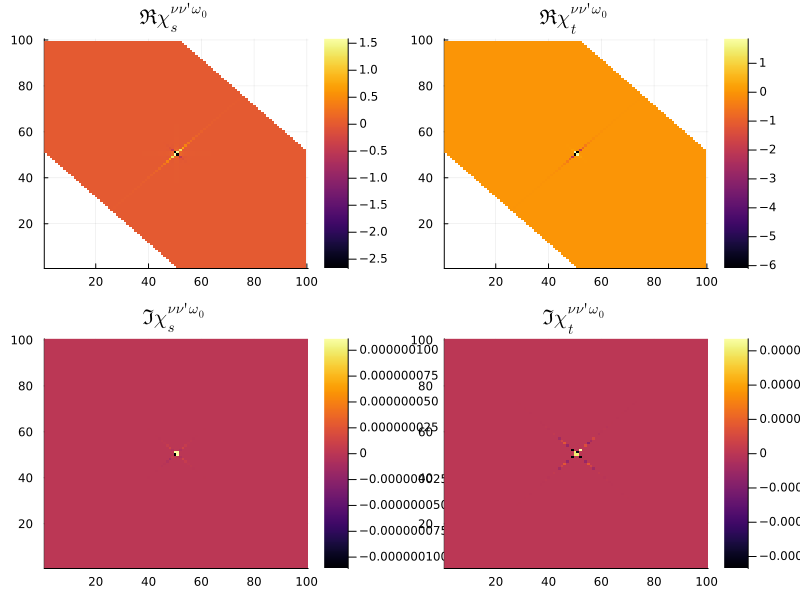

In [27]:
p1 = heatmap(real(χpp_s[:,:,ωi0]), title=L"\Re \chi^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(χpp_t[:,:,ωi0]), title=L"\Re \chi^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(χpp_s[:,:,ωi0]), title=L"\Im \chi^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(χpp_t[:,:,ωi0]), title=L"\Im \chi^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))

## Gamma

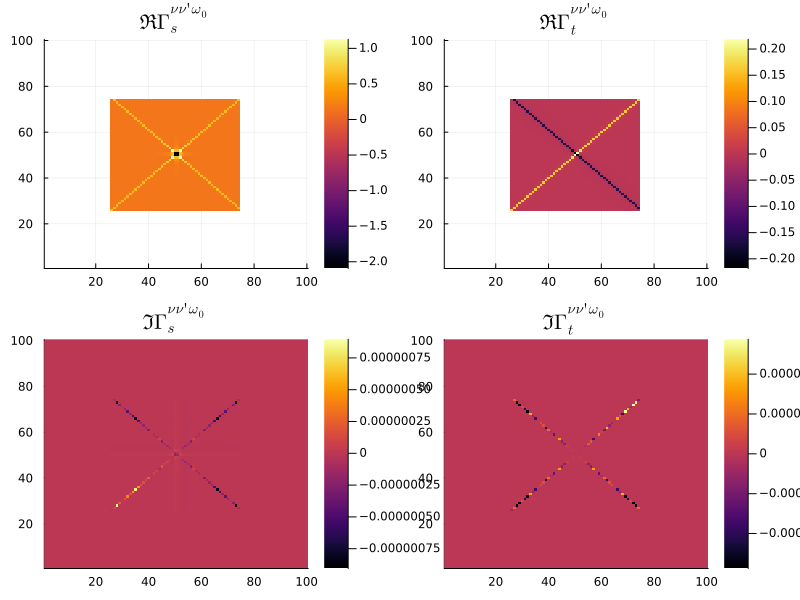

In [28]:
p1 = heatmap(real(Γs[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Γt[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Γs[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Γt[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))

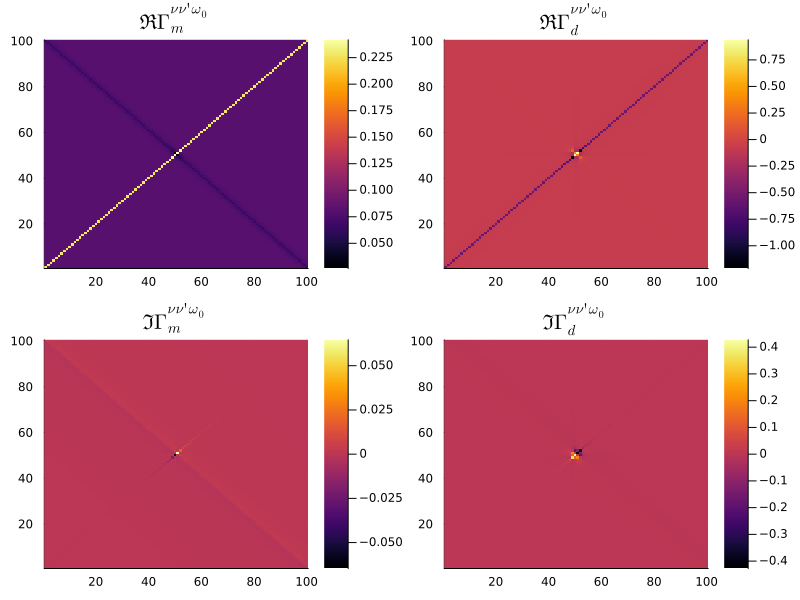

In [32]:
p1 = heatmap(real(Γm[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_m")
p2 = heatmap(real(Γd[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_d")
p3 = heatmap(imag(Γm[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_m")
p4 = heatmap(imag(Γd[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_d")
plot(p1, p2, p3, p4, size=(800,600))

## Full Vertex

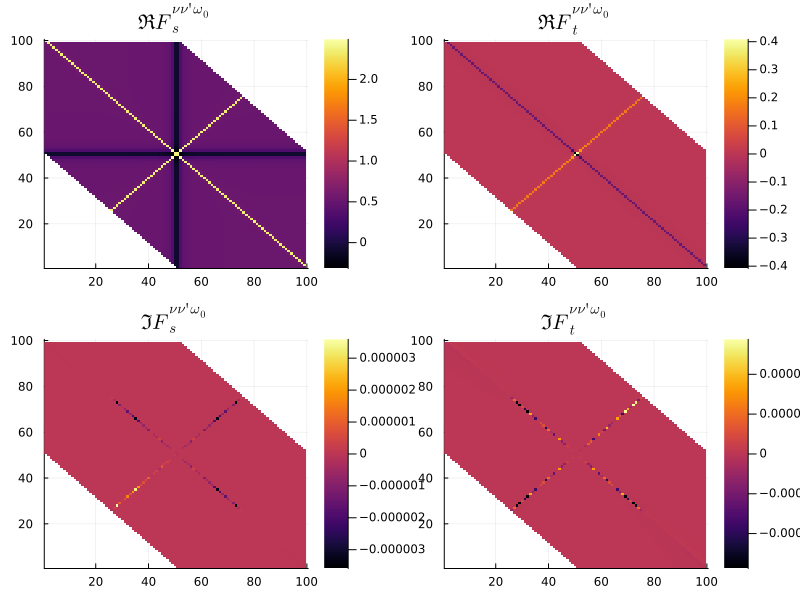

In [30]:
Fs_r = reshape(Fs, 2*nFermi, 2*nFermi, 2*nBose+1)
Ft_r = reshape(Ft, 2*nFermi, 2*nFermi, 2*nBose+1)

p1 = heatmap(real(Fs_r[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Ft_r[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Fs_r[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Ft_r[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))

## Phi

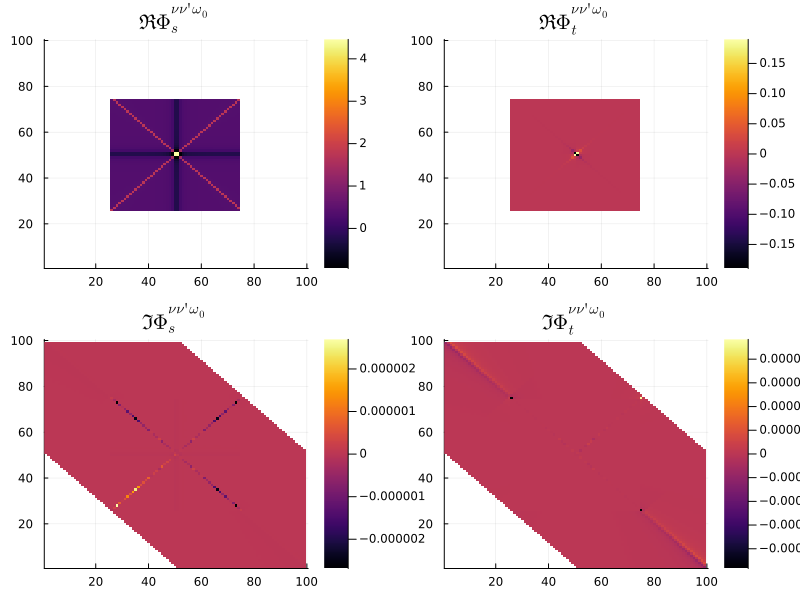

In [31]:
p1 = heatmap(real(Φs[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Φt[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Φs[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Φt[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(800,600))